In [94]:
import time
import math  # if needed
import fygen
from scipy.io import loadmat
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [95]:

fileName='reg_unificados_intc.mat'
dp=loadmat(fileName)
#dp.keys()
label_pf=list(dp.keys())[3]
df = pd.read_csv(fileName + '.log', sep=';')


In [96]:
df['matlab_degree'] = [_[0] if _[0]<=359 else 0 for _ in dp[label_pf]]
df['matlab_peak'] = [_[1] for _ in dp[label_pf]]
#df['matlab_peak_scale'] = [_[1]* (93/0.076382) for _ in dp[label_pf]]
#df['matlab_peak_scale'] = [_[1]* (93/0.076382) if _[1]<0.25 else _[1]* (373/0.255276) for _ in dp[label_pf]]

df['diff']=df['peak']/df['matlab_peak']

In [97]:
factor = df['diff'].sum()/df.shape[0]

In [98]:
df['matlab_peak_scale'] =  np.where(df['peak'] <0.25, df['peak'] / factor, df['peak'] / (373/0.255276))


In [99]:
df = df[['peak', 'matlab_peak', 'matlab_peak_scale', 'degree', 'matlab_degree']]

In [100]:
df.iloc[950:1010]

,peak,matlab_peak,matlab_peak_scale,degree,matlab_degree
950,50,0.042211,0.034219,49,49.811136
951,29,0.022111,0.019847,73,73.125576
952,-62,-0.048241,-0.048754,217,217.433700
953,-62,-0.048241,-0.048754,244,244.642574
954,21,0.016080,0.014372,16,16.607231
955,45,0.038191,0.030797,30,30.864638
956,42,0.032161,0.028744,46,46.206730
957,61,0.048241,0.041748,64,64.257837
958,-53,-0.040201,-0.041677,217,217.151706
959,-82,-0.066332,-0.064482,247,247.422162


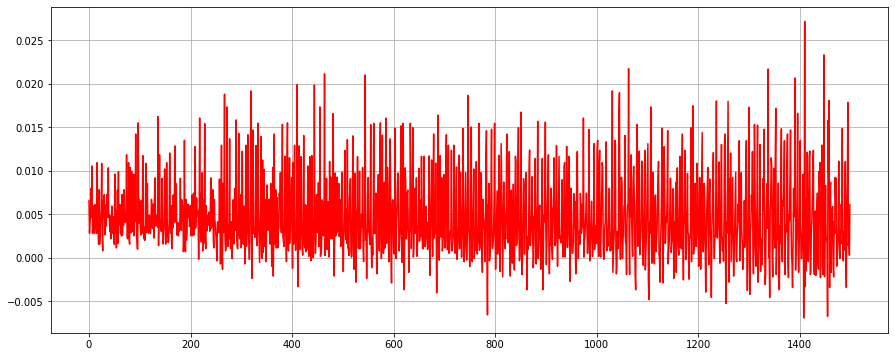

In [101]:
fig, ax = plt.subplots(figsize=(15, 6))

#plt.title(filename)
#plt.xlabel('degree')
#plt.ylabel('adc value')
plt.grid()

ax.plot( df['matlab_peak']-df['matlab_peak_scale'], color='red')
#ax.plot( df['matlab_degree']-df['degree'], color='blue')
#ax.scatter(df['peak'], df['peak']-df['matlab_peak_scale'], color='blue', s=2)
#ax.plot(range(1500), df['matlab_peak_scale'], color='blue')
plt.savefig(fileName + '.peak.comp.png')
plt.show()

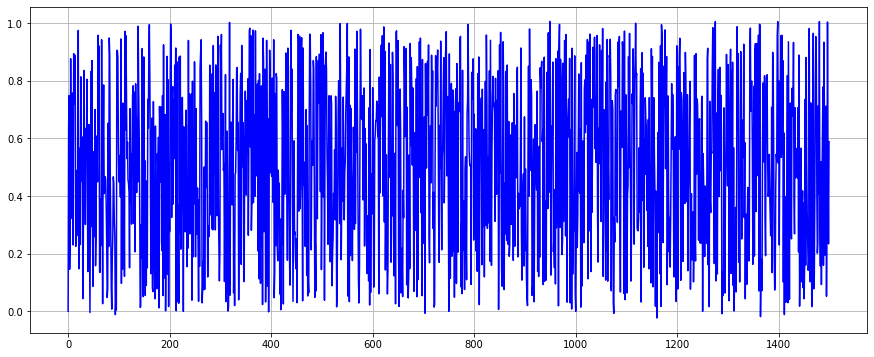

In [102]:
fig, ax = plt.subplots(figsize=(15, 6))

#plt.title(filename)
#plt.xlabel('degree')
#plt.ylabel('adc value')
plt.grid()

#ax.plot( df['matlab_peak']-df['matlab_peak_scale'], color='red')
ax.plot( df['matlab_degree']-df['degree'], color='blue')
#ax.scatter(df['peak'], df['peak']-df['matlab_peak_scale'], color='blue', s=2)
#ax.plot(range(1500), df['matlab_peak_scale'], color='blue')
plt.savefig(fileName + '.degree.comp.png')
plt.show()